In [ ]:
import pandas as pd
import ast
from ast import literal_eval
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import rcParams
warnings.filterwarnings('ignore')

import sys
import networkx as nx
from tqdm.notebook import tqdm
import pickle

In [ ]:
def read_data(path, sep):
    df = pd.read_csv(path, sep=sep)
    df.loc[:, 'AA'] = df['AA'].apply(lambda x: ast.literal_eval(x))
    df.loc[:, 'W'] = df['W'].apply(lambda x: ast.literal_eval(x))
    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
net = pd.read_csv('drive/MyDrive/Parkinson/aff_net.csv', sep = ';')

In [ ]:
in_degree = pd.read_excel('drive/MyDrive/Parkinson/index_affiliations_periods.xlsx', sheet_name = 'In-degree')

In [ ]:
in_degree_ranks = in_degree[['DAfN',	'AfId',	'2015',	'2016',	'2017',	'2018',	'2019',	'2020',	'2021']].copy()

In [ ]:
for year in ['2015',	'2016',	'2017',	'2018',	'2019',	'2020',	'2021']:
    in_degree_ranks.loc[:, year] = in_degree_ranks[year].rank(method = 'dense', ascending = False)

In [ ]:
def distance(M1, M2):
    return np.abs(np.array(M1) - np.array(M2)).sum()
    
def net_stability(net, ranks, eps):

    stability = []
    distance_C = []
    distance_R = []
    C = []
    R = []

    for year in tqdm(range(2015, 2022)):
        net_cur = net[net['Y'] == year]

        # pkl_file = open(f'drive/MyDrive/Stability/R_{eps}_{year}.pkl', 'rb')
        # R_t = pickle.load(pkl_file)
        # pkl_file.close()

        R_t = []
        for i in tqdm(range(len(ranks))):
            row_t = []
            for j in range(len(ranks)):
                rt = int(ranks.loc[i, str(year)] - ranks.loc[j, str(year)] > eps)
                row_t.append(rt)

            R_t.append(row_t)

        R.append(R_t)

        output = open(f'drive/MyDrive/Stability/R_{eps}_{year}.pkl', 'wb')
        pickle.dump(R_t, output)
        output.close()

        # pkl_file = open(f'drive/MyDrive/Stability/C_{eps}_{year}.pkl', 'rb')
        # C_t = pickle.load(pkl_file)
        # pkl_file.close()

        C_t = []

        for i in tqdm(range(len(ranks))):
            af_i = ranks.loc[i, 'AfId']
            
            if af_i not in net_cur['AfId1'].values:
                C_t.append([0] * len(ranks))
                continue

            row_t = []
            for j in range(len(ranks)):
                af_j = ranks.loc[j, 'AfId']
                if af_j not in net_cur['AfId2'].values:
                    row_t.append(0)
                else:
                    net_tmp = net_cur[net_cur['AfId2'] == af_j]

                    if len(net_tmp[net_tmp['AfId1'] == af_i]) == 0:
                        row_t.append(0)
                    else:
                        row_t.append(net_tmp[net_tmp['AfId1'] == af_i]['weight'].values[0] / net_tmp['weight'].sum())
                     
            C_t.append(row_t)

        C.append(C_t)

        output = open(f'drive/MyDrive/Stability/C_{eps}_{year}.pkl', 'wb')
        pickle.dump(C_t, output)
        output.close()

      
    for i in tqdm(range(1, len(C))):
        R_t = R[i-1]
        R_t1 = R[i]
        C_t = C[i-1]
        C_t1 = C[i]
        
        gamma = max(np.max(C_t), np.max(C_t1))
        d_C = distance(C_t, C_t1) / (len(ranks)**2 * gamma)
        distance_C.append(d_C)

        d_R = distance(R_t, R_t1) / (len(ranks) * (len(ranks) - 1))
        distance_R.append(d_R)

        res = np.sqrt((d_R**2 + d_C**2)/2)
        stability.append(res)
    
    return stability, distance_R, distance_C, R, C

                

In [ ]:
stability, d_R, d_C, R, C = net_stability(net, in_degree_ranks, 5)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/3029 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import pickle
output = open('drive/MyDrive/Stability/stability_5.pkl', 'wb')
pickle.dump(stability, output)
output.close()

output = open('drive/MyDrive/Stability/d_R_5.pkl', 'wb')
pickle.dump(d_R, output)
output.close()

output = open('drive/MyDrive/Stability/d_C_5.pkl', 'wb')
pickle.dump(d_C, output)
output.close()

output = open('drive/MyDrive/Stability/R_5.pkl', 'wb')
pickle.dump(R, output)
output.close()

output = open('drive/MyDrive/Stability/C_5.pkl', 'wb')
pickle.dump(C, output)
output.close()


In [ ]:
stability

[0.05366840282942843,
 0.052604855239675875,
 0.04488223559989083,
 0.04973815059097053,
 0.05306288789496414,
 0.05076510049773964]

In [ ]:
d_R

[0.07589841571109394,
 0.07439413280603659,
 0.06347240872359791,
 0.07033953596083303,
 0.07504122413324651,
 0.07179137557551332]

In [ ]:
d_C

[0.00015942731752262743,
 0.0002336527600955438,
 0.0002889216377288932,
 0.000341949169907913,
 0.00039347692553024627,
 0.0004350288114609418]

In [ ]:
a = [[0.01, 0.4], [0, 0.8]]
max(np.max(a), np.max(a))

0.8

In [ ]:
import pickle
output = open('drive/MyDrive/Stability/stability.pkl', 'rb')
stability = pickle.load(output)
output.close()

output = open('drive/MyDrive/Stability/d_R.pkl', 'rb')
d_R = pickle.load(output)
output.close()

output = open('drive/MyDrive/Stability/d_C.pkl', 'rb')
d_C = pickle.load(output)
output.close()

output = open('drive/MyDrive/Stability/R.pkl', 'rb')
R = pickle.load(output)
output.close()

output = open('drive/MyDrive/Stability/C.pkl', 'rb')
C = pickle.load(output)
output.close()


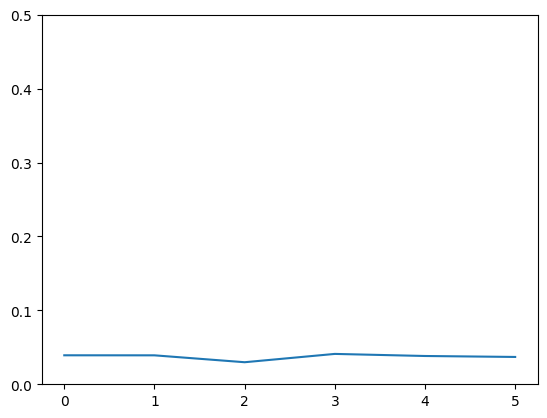

In [ ]:
plt.plot(stability)
plt.ylim(0, 0.5)
plt.show()

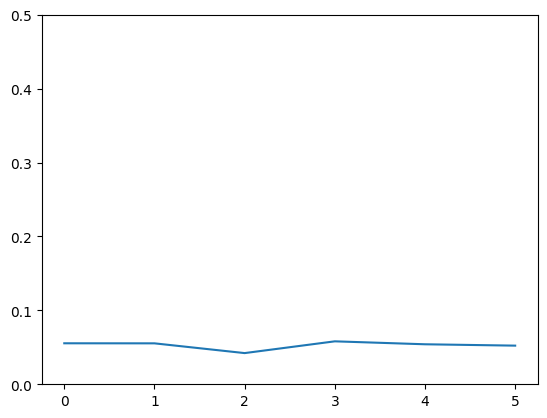

In [ ]:
plt.plot(d_R)
plt.ylim(0, 0.5)
plt.show()

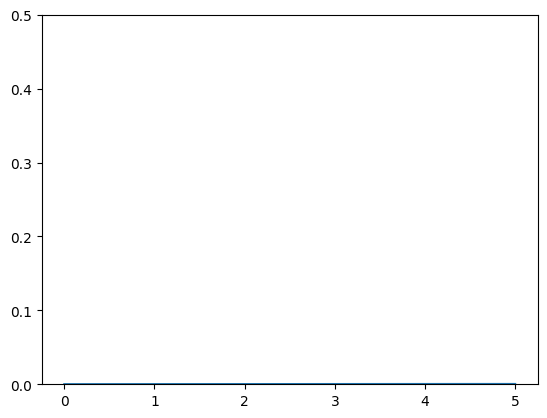

In [ ]:
plt.plot(d_C)
plt.ylim(0, 0.5)
plt.show()

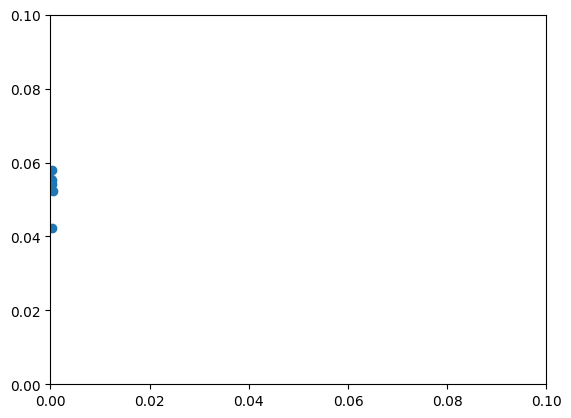

In [ ]:
plt.scatter(d_C, d_R)
plt.xlim(0, 0.1)
plt.ylim(0, 0.1)
plt.show()